## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import pymc3 as pm

In [6]:
# an un-fair coin problem

n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)
    
    y = pm.Binomial('y', n=n, p=p, observed=k)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:08<00:00, 2446.14draws/s]


In [7]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.607603,0.047196,0.000523,0.512433,0.695975,7851.37112,1.000084


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a2f72e8>,
      dtype=object)

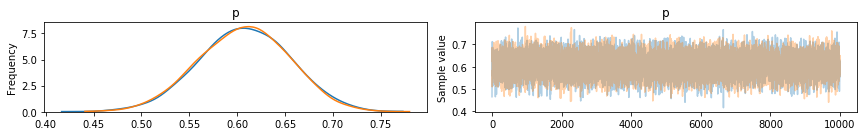

In [8]:
pm.traceplot(trace)

In [9]:
gdata=pd.read_csv('gapminder.csv').query('year==1985')

In [10]:
gdata.sort_values('age5_surviving',inplace=True)

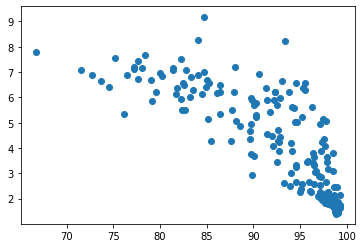

In [11]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

In [17]:

with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept', 5, 15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                      mu = intercept + slope * (gdata['age5_surviving']-65),
                      sd = 1,
                      observed = gdata['babies_per_woman'])
    trace2 = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:28<00:00, 743.00draws/s]
The acceptance probability does not match the target. It is 0.8916544575118366, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8811219789180682, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [18]:
pm.summary(trace2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,10.199037,0.279645,0.004573,9.664466,10.739618,3967.591744,0.999994
slope,-0.219408,0.010117,0.000165,-0.238717,-0.199847,3972.998167,1.000014


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1bf9aa20>,
      dtype=object)

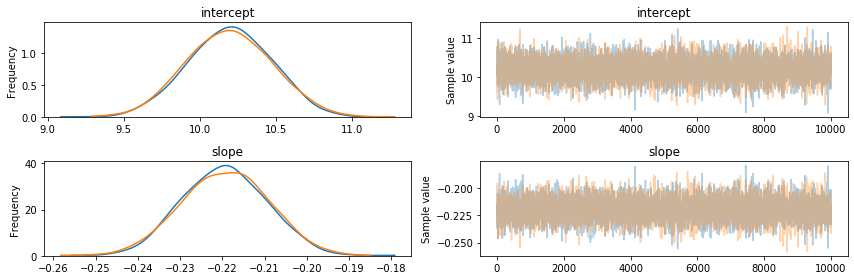

In [19]:
pm.traceplot(trace2)

In [22]:
babies = trace2['intercept'].mean() + trace2['slope'].mean() * (gdata['age5_surviving']-65)

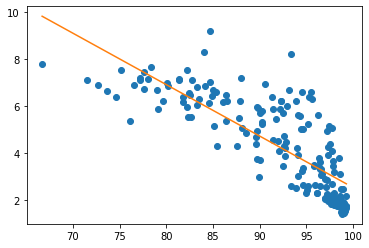

In [23]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'], babies, 'C1')

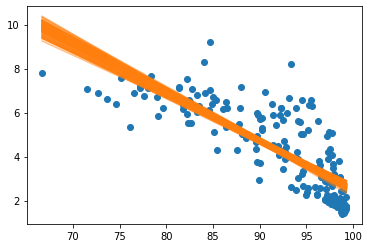

In [31]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
for i, intercept, slope in zip(range(100), trace2['intercept'][::50],trace2['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving']-65)
    pp.plot(gdata['age5_surviving'], babies, 'C1',alpha=0.5)